### Higher Diploma in Science - Data Analytics 2020/21

### Fundamentals of Data Analysis Project

#### Prepared by: Fiona Lee 
#### Due Date - 8 January 2021


***

### Fundamentals of Data Analysis - Project Instructions:

In  this  project  you  must  perform  and  explain  simple  linear  regression  using  Python on the power production dataset available on Moodle.  

The goal is to accurately predict wind turbine power output from wind speed values using the data set as a basis.

Your submission must be in the form of a git repository containing, at a minimum, thefollowing items:

1.  Jupyter notebook that performs simple linear regression on the data set.
2.  In that notebook, an explanation of your regression and an analysis of its accuracy.
3.  Standard items in a git repository such as a README.

To enhance your submission, you might consider comparing simple linear regression to other types of regression on this data set. 

### Import Modules 
***

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame

<BR>

### Import the Dataset
***

In [2]:
df = pd.read_csv('Wind-Power.csv')
pd.set_option('max_colwidth',100)
print(df)

      speed  power
0     0.000    0.0
1     0.125    0.0
2     0.150    0.0
3     0.225    0.0
4     0.275    0.0
..      ...    ...
495  24.775    0.0
496  24.850    0.0
497  24.875    0.0
498  24.950    0.0
499  25.000    0.0

[500 rows x 2 columns]


In [3]:
#Check if characters in the data imported is the same type
print(df.dtypes)

speed    float64
power    float64
dtype: object


In [4]:
#Check if there are any empty cells in the dataframe
pd.set_option("display.max_rows", 500)# Option to display all entries
df.style.highlight_null(null_color='red'); #highlight any null values in red
#print(df.isnull()) #Option to print the dataset

In [5]:
#Check for corrupt data
print ("power shape = ",df.shape)

power shape =  (500, 2)


In [6]:
#Re-name the columns from the original dataset
df.rename(columns={'speed':'Speed_Mph'},inplace = True)
df.rename(columns={'power':'Power_KWph'},inplace = True)

In [7]:
#Add Power/Speed Column
df['Power:Speed'] = (df ['Power_KWph'] / df ['Speed_Mph']) #Add Power/Speed Column
df.replace(to_replace = np.nan, value = 0.00)  
pd.set_option("display.precision", 3)
df.style.set_properties(subset=["Power_KWph", "Speed_Mph"], **{'text-align': 'centre'});
#https://www.codegrepper.com/code-examples/python/how+to+align+column+name+to+center+in+pandas+dataframe
#del df['power/speed']; #delete additional column

<BR>

### High Level Analysis
***

In [8]:
#Show the entire dataset sorted by Speed
pd.set_option("display.max_rows", None)#Show the entire dataset
pd.set_option("display.precision", 3) #Round the results to 3 decimal places
df.sort_values(by =['Speed_Mph'], inplace=True, ascending=True)#Sort the dataset in descending order
#https://datatofish.com/sort-pandas-dataframe/
df.style.set_properties(subset = ["Power KWph", "Speed Mph"], **{'text-align': 'right'})
#https://www.kite.com/python/answers/how-to-print-an-entire-pandas-dataframe-in-python
print ("")

In [9]:
#Option to print the dataset
#df[['Speed_Mph','Power_KWph','Power:Speed']]

In [10]:
#Show basic summary information
print ("")
pd.set_option("display.precision", 0)
# https://realpython.com/pandas-groupby/
(df.describe())

,Speed_Mph,Power_KWph,Power:Speed
count,500,500,499
mean,13,48,3
std,7,42,2
min,0,0,0
25%,6,5,1
50%,13,42,4
75%,19,94,5
max,25,114,14


### Analyse the Data:
***

Wind turbines typically start operating at wind speeds around 8-12 miles per hour (mph). Turbines reach maximum power output at 25-30 mph. At very high wind speeds, i.e. 55 mph or greater the wind turbines shut down to prevent excessive wear and tear. https://enerpower.ie/portfolio/wind-turbine-faq-ireland/

In [11]:
#If wind speed is higher than 8 and power output is zero, the turbine must have been out of order so these samples should be eliminate.

print("\nSummary of Results:\n")
print ("|--------------|------------------|---------|---------------------------------------------------------------------|")
print ("|  Wind Speed  |   Power Output   | No. of  |          Commentary                                                 |")
print ("|    Range     |      Range       | Samples |                                                                     |")
print ("|--------------|------------------|---------|---------------------------------------------------------------------|")
print ("|     0-8mph   |        0 KWph    |   ",(len(df["Power_KWph"][(df["Speed_Mph"]<=8)&(df["Power_KWph"]==0)])),"  | Zero power output produced at low wind speeds of 0-8 mph")
print ("|     0-8mph   |  0.01-15 KWph    |  ",(len(df["Power_KWph"][(df["Speed_Mph"]>0)&(df["Speed_Mph"]<=8)&(df["Power_KWph"]>0)&(df["Power_KWph"]<=15)])),"  | Flat rate of power output produced relative to increase in wind speed")
print ("|    8-18mph   |    3-103 KWph    |  ",(len(df["Power_KWph"][(df["Speed_Mph"]>8)&(df["Speed_Mph"]<=18)&(df["Power_KWph"]>0)&(df["Power_KWph"]<=103)])),"  | Exponential rate of power output relative to increase in wind speed")
print ("|   18-25mph   |   87-114 KWph    |  ",(len(df["Power_KWph"][(df["Speed_Mph"]>18)&(df["Power_KWph"]>0)&(df["Power_KWph"]<=120)])),"  | Flat rate of power output produced relative to increase in wind speed")
print ("|    8-25mph   |        0 KWph    |   ",(len(df["Power_KWph"][(df["Speed_Mph"]>8)&(df["Power_KWph"]==0)])),"  | Zero power output produced at wind speeds of 8-25mph - Out of order ")
print ("|--------------|------------------|---------|---------------------------------------------------------------------|")
print ("|    Total     |                  |  ",(len(df["Power_KWph"][(df["Speed_Mph"]>=0)&(df["Power_KWph"]>=0)])),"  |                                                                     |")
print ("|--------------|------------------|---------|---------------------------------------------------------------------|\n")



Summary of Results:

|--------------|------------------|---------|---------------------------------------------------------------------|
|  Wind Speed  |   Power Output   | No. of  |          Commentary                                                 |
|    Range     |      Range       | Samples |                                                                     |
|--------------|------------------|---------|---------------------------------------------------------------------|
|     0-8mph   |        0 KWph    |    35   | Zero power output produced at low wind speeds of 0-8 mph
|     0-8mph   |  0.01-15 KWph    |   128   | Flat rate of power output produced relative to increase in wind speed
|    8-18mph   |    3-103 KWph    |   194   | Exponential rate of power output relative to increase in wind speed
|   18-25mph   |   87-114 KWph    |   129   | Flat rate of power output produced relative to increase in wind speed
|    8-25mph   |        0 KWph    |    14   | Zero power output p

Tip speed ratio is recommended to be between 6 and 8 eg. for a grid connected wind turbine with 3 blades, the optimum ratio is suggested as 7. www.mdpi.com


In [12]:
print("\nOutput Efficiency Assessment :\n")
print ("|--------------|------------------|---------|---------------------------------------------------------------------|")
print ("|              |   Power Output   | No. of  |          Commentary                                                 |")
print ("|              |      Range       | Samples |                                                                     |")
print ("|--------------|------------------|---------|---------------------------------------------------------------------|")
print ("|              |          0       |   ",(len(df["Power_KWph"][(df["Power_KWph"]==0)])),"  | Zero power output")
print ("|              |        0-5       |  ",(len(df["Power_KWph"][(df["Power:Speed"]>0)&(df["Power:Speed"]<=6)])),"  | Sub Optimum Wind Speed:Power Output")
print ("|              |        6-8       |    ",(len(df["Power_KWph"][(df["Power:Speed"]>6)&(df["Power:Speed"]<=8)])),"  | Optimum Wind Speed:Power Output")
print ("|              |         8+       |   ",(len(df["Power_KWph"][(df["Power:Speed"]>8)])),"  | > Optimum output")
print ("|--------------|------------------|---------|---------------------------------------------------------------------|")
print ("|              |      Total       |  ",(len(df["Power_KWph"][(df["Speed_Mph"]>=0)&(df["Power_KWph"]>=0)])),"  |                                                                     |")
print ("|--------------|------------------|---------|---------------------------------------------------------------------|\n")



Output Efficiency Assessment :

|--------------|------------------|---------|---------------------------------------------------------------------|
|              |   Power Output   | No. of  |          Commentary                                                 |
|              |      Range       | Samples |                                                                     |
|--------------|------------------|---------|---------------------------------------------------------------------|
|              |          0       |    49   | Zero power output
|              |        0-5       |   439   | Sub Optimum Wind Speed:Power Output
|              |        6-8       |     2   | Optimum Wind Speed:Power Output
|              |         8+       |    10   | > Optimum output
|--------------|------------------|---------|---------------------------------------------------------------------|
|              |      Total       |   500   |                                                       

#### Identify Trends:

In [13]:
print("")
pd.set_option("display.precision", 2)
# https://realpython.com/pandas-groupby/
df.style.set_properties(subset = ["Power_KWph", "Speed_Mph"], **{'text-align': 'center'});
df.groupby(['Power_KWph']).agg(['count'])

,Speed_Mph,Power:Speed
,count,count
Power_KWph,,
0.00,49,48
0.07,1,1
0.11,1,1
0.12,1,1
0.13,1,1
0.67,1,1
0.80,1,1
0.82,1,1


#### Analyse the Results where Power_KWph equals Zero:

In [14]:
df.sort_values(by=['Speed_Mph'], inplace=True, ascending=True)#Sort the dataset in descending order
#df = df.drop('Power:Speed', axis=1)

#Option to print the dataset subset where Power_KWph = 0
#df[df['Power_KWph'] == 0]

#### Identify & Remove Outliers:

In [15]:
# Create a new Column identifying rows where Power_KWph = 0 and Speed_Mph > 8 and less than 55mph
def Power(row):
    if row['Power_KWph'] == 0 and row['Speed_Mph'] > 8:
        return 'Power Outage'
    if row['Power_KWph'] == 0 and row['Speed_Mph'] > 55:
        return 'Shut Down'    
    else:
        return 'Normal'
    
#To populate a column called 'Risk' in the dataframe from the results above  
df['Zero Power'] = df.apply(lambda row: Power(row), axis=1)
pd.set_option("display.precision", 3)
df.sort_values(by=['Speed_Mph'], inplace=True, ascending=False)#Sort the dataset in ascending order

#Option to print the dataset
#df

#### Create a subset dataframe (df2) for results where Power_KWph = > and and Speed_Mph > 8:

In [16]:
pd.set_option("display.precision", 3)
df2 = df[df['Zero Power'] == 'Normal']

#Option to view the dataset summary
#df2.describe()

#Option to print the new dataset
#df2

#### Create data to populate a new column called 'Optimum Ratio' based on Power:Speed Ratio:

In [17]:
def Optimum(row):

    if row['Power:Speed'] == 0:
        return 'No Output'
    if row['Speed_Mph']== 0 and row['Power_KWph'] == 0:
        return 'No Output'
    if row['Power:Speed'] > 0 and row['Power:Speed'] < 6 and row['Speed_Mph'] < 8:
        return 'Low Wind Speed ( < 8mph)' 
    if row['Power:Speed'] > 0 and row['Power:Speed'] < 6 and row['Speed_Mph'] >= 8:
        return 'Sub Optimum (<8)'        
    if row['Power:Speed'] >= 6 and row['Power:Speed'] <= 8:
        return 'Optimum (6-8)'     
    if row['Power:Speed'] > 8 and row['Speed_Mph'] < 8 :
        return 'Exceptional Power Output (>8)'    
    if row['Power:Speed'] > 8 and row['Speed_Mph'] >= 8:
        return '> Optimum'             
    else:
        return 'null'
    
#To populate a column called 'Optimum_Ratio' in the dataframe from the results above  
pd.set_option('mode.chained_assignment', None)#Turn off chained warnings
#https://www.dataquest.io/blog/settingwithcopywarning/
df2['Optimum_Ratio'] = df.apply(lambda row: Optimum(row), axis=1) 
df2.groupby(['Optimum_Ratio']).count()

,Speed_Mph,Power_KWph,Power:Speed,Zero Power
Optimum_Ratio,,,,
Exceptional Power Output (>8),10,10,10,10
Low Wind Speed ( < 8mph),116,116,116,116
No Output,35,35,34,35
Optimum (6-8),2,2,2,2
Sub Optimum (<8),323,323,323,323


In [18]:
df2.sort_values(by=['Power:Speed'], inplace=True, ascending=False)#Sort the dataset in ascending order

df2.describe()

#Option to print the dataset with new column
#df2

,Speed_Mph,Power_KWph,Power:Speed
count,486.000,486.000,485.000
mean,12.298,49.398,3.319
std,7.084,41.392,2.237
min,0.000,0.000,0.000
25%,6.137,5.868,1.241
50%,12.349,44.773,3.961
75%,18.387,93.751,4.934
max,24.399,113.556,13.903


### Visualise the Data:
***

#### Plot Entire Dataset including Outliers

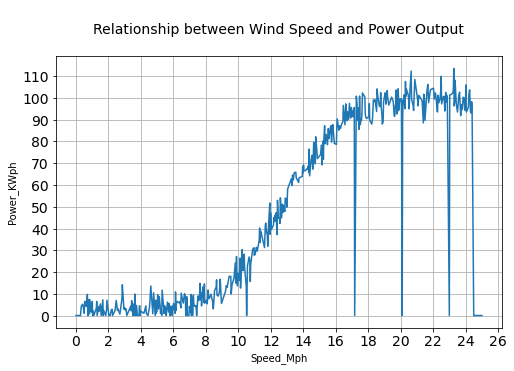

In [19]:
plt.figure(figsize = (8, 5)) 
plt.title('\nRelationship between Wind Speed and Power Output\n', fontsize = 14)
plt.xticks([0, 2, 4, 6,8,10,12,14,16,18,20,22,24,26], size =14)
plt.yticks([0, 10,20,30,40,50,60,70,80,90,100,110,120], size =14)
plt.grid(True)
plt.rcParams["axes.labelsize"] = 14
sns.lineplot (x=df.Speed_Mph,y=df.Power_KWph)
plt.show()

#### Plot the dataset with Assumed 'Power Outages' (Outliers) Removed

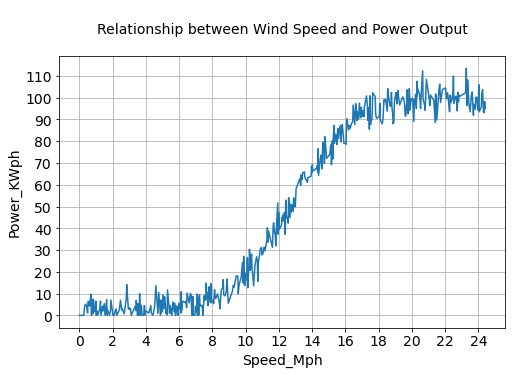

In [20]:
plt.figure(figsize = (8, 5)) 
plt.title('\nRelationship between Wind Speed and Power Output\n', fontsize = 14)
plt.xticks([0, 2, 4, 6,8,10,12,14,16,18,20,22,24,26], size =14)
plt.yticks([0, 10,20,30,40,50,60,70,80,90,100,110,120], size =14)
plt.grid(True)
plt.rcParams["axes.labelsize"] = 14
sns.lineplot (x=df2.Speed_Mph,y=df2.Power_KWph)
plt.show()

### More Plots:
***

#### Plot the Frequency of Speed and Power

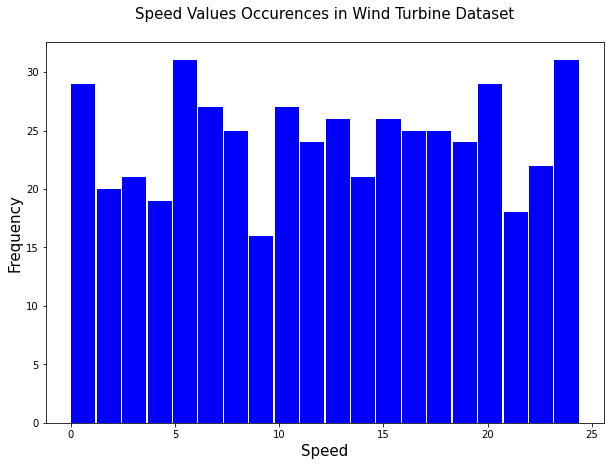

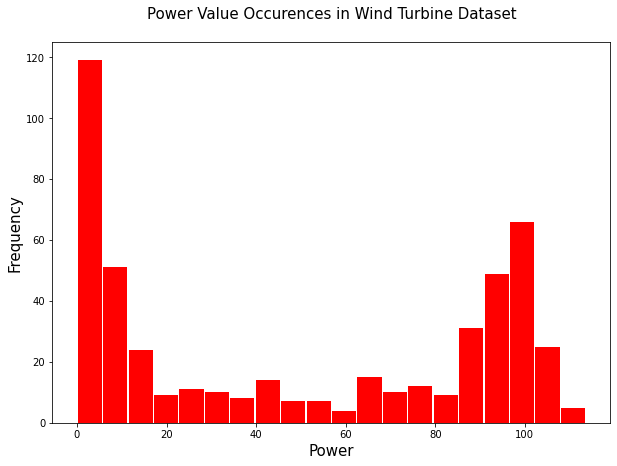

In [21]:
print ("")
plt.figure(figsize = (10, 7)) 
x = df2 ["Speed_Mph"] 
plt.hist(x, bins = 20, color = "blue", rwidth = 0.95) 
plt.title("Speed Values Occurences in Wind Turbine Dataset\n", fontsize = 15) 
plt.xlabel("Speed", fontsize = 15) 
plt.ylabel("Frequency", fontsize = 15) 
plt.show()
print ("")
plt.figure(figsize = (10, 7)) 
x = df2 ["Power_KWph"] 
plt.hist(x, bins = 20, color = "red", rwidth = 0.95) 
plt.title("Power Value Occurences in Wind Turbine Dataset\n", fontsize = 15) 
plt.xlabel("Power", fontsize = 15) 
plt.ylabel("Frequency", fontsize = 15) 
plt.show()

#### Plot Speed and Power Results on the Same Axis


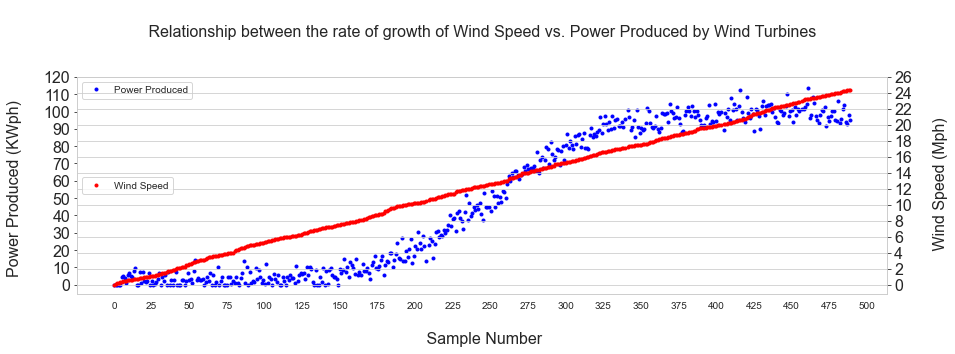

In [22]:
#https://stackoverflow.com/questions/11640243/pandas-plot-multiple-y-axes
plt.rcParams["axes.labelsize"] = 8
sns.set_style ("whitegrid")
fig, ax = plt.subplots()
rspine = ax.spines ['right']
rspine.set_position (('axes', 1))
ax.set_frame_on (True)
ax.patch.set_visible (True)
ax.grid(True)
fig.subplots_adjust(right = 2)
df2.Power_KWph.plot(ax = ax, style = 'b.',label = "Power Produced")
plt.yticks([0,10,20,30,40,50,60,70,80,90,100,110,120],fontsize = 16)
ax.legend(loc = 0)
plt.xlabel("\n Sample Number",fontsize = 16)
plt.ylabel("Power Produced (KWph) \n",fontsize = 16)

# same ax as above since it's automatically added on the right
df2.Speed_Mph.plot(ax = ax, style = 'r.', label = "Wind Speed", secondary_y = True)
plt.yticks([0, 2, 4, 6,8,10,12,14,16,18,20,22,24,26],fontsize = 16)
plt.xticks([0,25, 50,75, 100, 125, 150, 175, 200, 225, 250, 275,300,325,350,375,400,425,450,475,500],fontsize = 16)
plt.ylabel("\n Wind Speed (Mph)",fontsize = 16)
plt.title("\n Relationship between the rate of growth of Wind Speed vs. Power Produced by Wind Turbines \n\n" , fontsize = 16)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
plt.legend (loc = "center left", frameon = True)
bbox_to_anchor=(10, 500)
plt.show()


### Plot the Normalised Dataset (df2) as a Scatterplot with a Regression Line:

<Figure size 720x432 with 0 Axes>

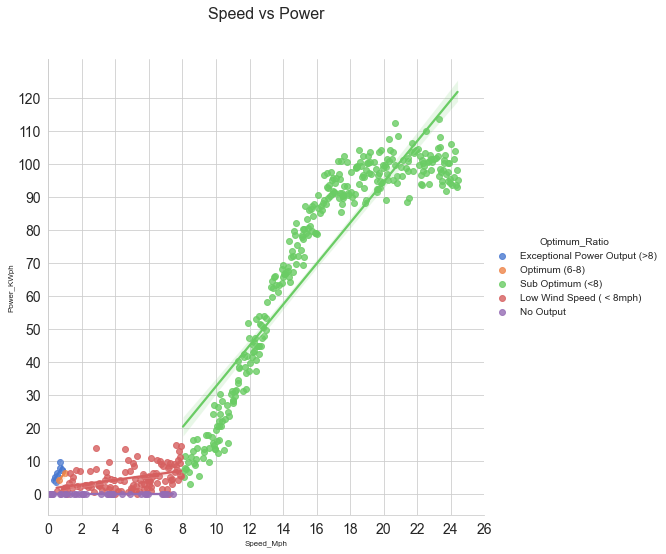

In [23]:
print ("")
#plt.rcParams["figure.figsize"] = (12,8)
plt.figure(figsize = (10, 6)) 
sns.set_style ("whitegrid")
sns.lmplot(x="Speed_Mph", y='Power_KWph', hue='Optimum_Ratio', palette="muted", height = 7 ,data=df2);#use data including power outages
plt.title("Speed vs Power\n\n", fontsize = 16)
plt.rcParams["axes.labelsize"] = 14;
plt.xticks([0, 2, 4, 6,8,10,12,14,16,18,20,22,24,26], fontsize = 14)
plt.yticks([0, 10,20,30,40,50,60,70,80,90,100,110,120], fontsize = 14)
plt.show()

### Predict expected Power based on a Given Speed
***

In [24]:
%matplotlib inline
from sklearn.linear_model import LinearRegression

#### Polyfit

In [25]:
#https://github.com/ianmcloughlin/jupyter-teaching-notebooks/blob/master/simple-linear-regression.ipynb

Polyfit = np.polyfit (df2.Speed_Mph,df2.Power_KWph,1)
print ('Best Fit Line Values:\n')
print ("- 'm' (slope) of 'Best Fit Line' is", Polyfit[0] )
print ("- 'c' (co-efficient) of 'Best Fit Line' is", Polyfit[1] )

Best Fit Line Values:

- 'm' (slope) of 'Best Fit Line' is 5.55099089944282
- 'c' (co-efficient) of 'Best Fit Line' is -18.87009060732686


#### Alternative method of calculating the slope (m) and the co-efficient (c)

In [80]:
# First calculate the means (a.k.a. averages) of df2.Speed_Mph and df2.Power_KWph:
df2.Speed_Mph_avg = np.mean(df2.Speed_Mph)
df2.Power_KWph_avg = np.mean(df2.Power_KWph)

# Subtract means from df2.Speed_Mph and df2.Power_KWph:
df2.Speed_Mph_zero = df2.Speed_Mph - df2.Speed_Mph_avg
df2.Power_KWph_zero = df2.Power_KWph - df2.Power_KWph_avg

# The best m is found by the following calculation:
m = np.sum(df2.Speed_Mph_zero * df2.Power_KWph_zero) / np.sum(df2.Speed_Mph_zero * df2.Speed_Mph_zero)

# Use m from above to calculate the best c:
c = df2.Power_KWph_avg - m * df2.Speed_Mph_avg

print ('\nBest Fit Line Values:\n')
print ("- The slope of the 'Best Fit Line'(m)is",(round(m,6)))
print ("- The value of y when x = 0 of the 'Best Fit' Line (c) is",round(c,6),"\n")



Best Fit Line Values:

- The slope of the 'Best Fit Line'(m)is 5.550991
- The value of y when x = 0 of the 'Best Fit' Line (c) is -18.870091 



#### Fitting the Model

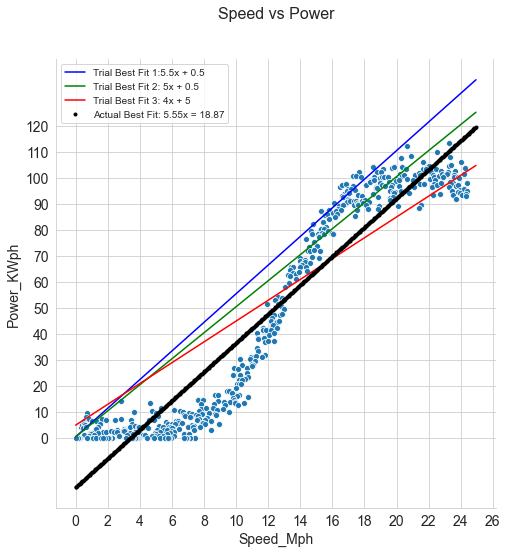

In [122]:
print ("")
plt.rcParams["figure.figsize"] = (28,24)
#plt.figure(figsize = (8, 6)) 
sns.set_style ("whitegrid")
#plt.plot (df2.Speed_Mph,df2.Power_KWph,'y.', label = r"Actual Data")
sns.relplot(x = "Speed_Mph", y = 'Power_KWph', palette="muted",height = 7, data=df2)#use data including power outages
plt.title("Speed vs Power\n\n", fontsize = 16)
plt.rcParams["axes.labelsize"] = 14
plt.xticks([0, 2, 4, 6,8,10,12,14,16,18,20,22,24,26], fontsize = 14)
plt.yticks([0, 10,20,30,40,50,60,70,80,90,100,110,120], fontsize = 14)

#Generate Trial Data to estimate the 'Best Fit Line'
x = np.arange (0.0,25.0,(1/len(df2.Speed_Mph)*25))
plt.plot (x, 5.5 * x + 0.5, 'b-', label = r"Trial Best Fit 1:5.5x + 0.5")
plt.plot (x, 5 * x + 0.5, 'g-', label = r"Trial Best Fit 2: 5x + 0.5")
plt.plot (x, 4 * x + 5, 'r-', label = r"Trial Best Fit 3: 4x + 5")

#Use the Polyfit results to generate the 'Best Fit Line' 
y = Polyfit[0] * x + Polyfit[1]
plt.plot (x, y, 'k.', label = r"Actual Best Fit: 5.55x = 18.87")# Plot the best fit line over the data points.
plt.legend()
plt.show()



In [121]:
#Check to make sure the length of the arrays are equal
#print(len(df2.Speed_Mph),len(x))

In [119]:
#Best Fit Co-ordinates
#print (list(zip(x,y)))

#### Calculate the 'Cost' of the Lines Above

In [29]:
#cost = lambda m,c: np.sum([(df2.Power_KWph[i] - m * df2.Speed_Mph[i] - c)**2 for i in range(len(df2.Speed_Mph))]
#print("Cost with m = ",m,"and c =",c,":",%8.2f % (cost(m, c)))

In [88]:
#cost 'Best Fit' = lambda Polyfit[0],Polyfit[1]: np.sum([(df2.Power_KWph[i] - m * df2.Speed_Mph[i] - c)**2 for i in range(df2.Speed_Mph.size)])
#cost = np.sum([(df2.Power_KWph[i] - m * df2.Speed_Mph[i] - c)**2 for i in range(len(df2.Speed_Mph))])

#print("Cost with m =", Polyfit[0], "and c =", Polyfit[1],"is", cost)
#print("Cost with m = Polyfit[0] and c = Polyfit[0]: %8.2f" % (cost(Polyfit[0],  Polyfit[1])))
#print("Cost with m = Polyfit[0] and c = Polyfit[0]:" %8.2f" % (cost(4.0, 5.0)))

<BR>

### Predict expected speed based on a Given Power
***

#### Using Numpy Poly1d Method

In [32]:
Predict = np.poly1d (Polyfit)
#https://data36.com/linear-regression-in-python-numpy-polyfit/

#### Insert Value for 'P' (Speed) to Predict Power Output

In [89]:
P = 6  #Value of Speed 
print ("\nThe Predicted Power Output for a Wind Speed of",P,"Mph is",round(Predict(P),3),"KWph\n")


The Predicted Power Output for a Wind Speed of 6 Mph is 14.436 KWph



#### Alternative Method - Manual method using Polyfit Results:

In [63]:
y = Polyfit [0] * P + Polyfit [1]
print ("\nThe Predicted Power Output for a Wind Speed of",P,"Mph is",round(y,3),"KWph\n")


The Predicted Power Output for a Wind Speed of 6 Mph is 14.436 KWph



### End

***

#### End